In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.types import Date
from sqlalchemy.ext.declarative import declarative_base


In [3]:
# Create an engine to talk to the database
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

# Reflect an existing database (using automap_base) into a new model
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# View all of the classes that automap found
Base.classes.keys()

# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


# Create session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [4]:
# Find the most recent date in the data set and print it
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [5]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database ('2017-08-23',), 
# Calculate the date one year from the last date in data set ('2016-08-22'),
# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.date > '2016-08-22').\
    order_by(measurement.date).all()

## Save the query results as a Pandas DataFrame - rename the column for clarity 
# Set the index to the date column 
prcp_df = pd.DataFrame(prcp_scores, columns = ['Date', 'Precipitation'])
prcp_df.set_index('Date', inplace = True)

# Sort the dataframe by date
prcp_df.sort_values('Date')


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


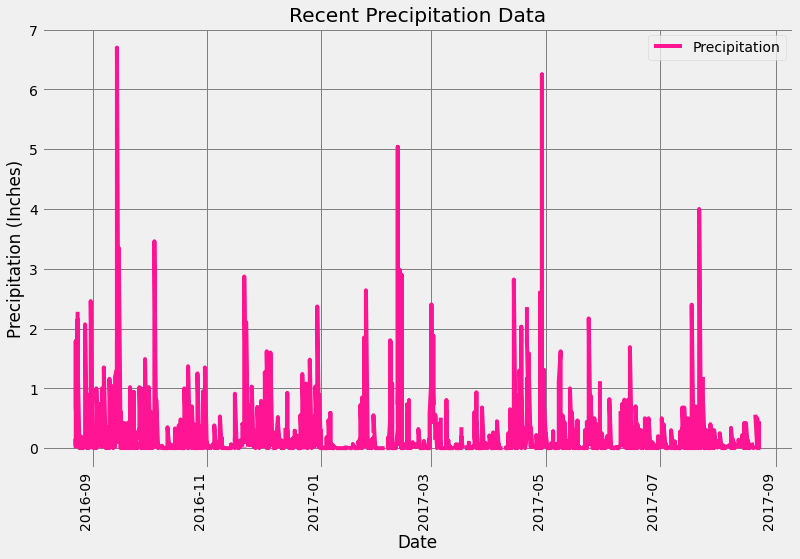

In [6]:
# # Use Pandas Plotting with Matplotlib to plot the data
# Convert date (string) to datetime format
prcp_df.index = pd.to_datetime(prcp_df.index, format='%Y-%m-%d')

# Plot the bar chart
prcp_df.plot(figsize=(12,9), color='deeppink', rot=90)

# Set the title for the chart and labels for x and y axis
plt.title('Recent Precipitation Data')
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.grid(color = 'gray', linestyle = '-', linewidth = 1.0)

# Save image to the 'Image' folder
plt.savefig('Images/recent_precipitation_data.png')

#Show image
plt.show()



In [7]:
# Use Pandas to calcualte the summary statistics for the precipitation data - use Series.to_frame() function to convert the given series (prcp) object to a dataframe and then use "describe" method get stats for precipitation.
stats_prcp = prcp_df['Precipitation'].to_frame()
stats_prcp.describe()



,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [8]:
# Design a query to calculate the total number stations in the dataset - use 'distinct' to find unique stations and the 'count'
total_station = session.query(func.count(func.distinct(measurement.station))).all()
total_station


[(9,)]

In [9]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_stations 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [10]:
# Using the most active station id from the previous query ('USC00519281', 2772)
# Calculate the lowest, highest, and average temperature
stats_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter_by(station = 'USC00519281').all()
stats_temp

[(54.0, 85.0, 71.66378066378067)]

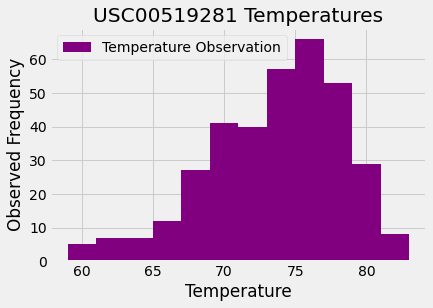

In [11]:
# Using the most active station id ('USC00519281', 2772)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_station_tobs = session.query(measurement.station, measurement.tobs).\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.date > '2016-08-22').\
    filter_by(station = 'USC00519281').all()
active_station_tobs   

# Convert the active_station_temp  query into dataframe for histogram
tobs_df = pd.DataFrame(active_station_tobs , columns = ['Station', 'Temperature Observation'])
tobs_df

# Plot the histogram
tobs_df.plot.hist(bins=12, color='purple')

# Set the title for the chart and labels for x and y axis
plt.title('USC00519281 Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Observed Frequency')

# Save image to the 'Image' folder
plt.savefig('Images/Temperature_histogram.png')

#Show image
plt.show()


# Close session

In [12]:
# Close Session
session.close()